<a href="https://colab.research.google.com/github/DurantZhou/ISYS5002-2024-S1-A2/blob/main/Tue_11AM_Group_2_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up the environment and import necessary modules

In [28]:
import sqlite3
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt

Explore the database

In [30]:
sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

In [31]:
sql = '''
PRAGMA table_info('AUS_energy');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

In [25]:
import pandas as pd
sql = '''
SELECT * FROM AUS_energy;
'''
#Load the data into a DataFrame
AUS_energy_df = pd.read_sql_query(sql,connection)

In [32]:
AUS_energy_df.head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


In [33]:
AUS_energy_df.tail()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [34]:
AUS_energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


Check the data schema

In [35]:
# Check general information about the dataframe
AUS_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


Check the duplicated values

In [36]:
AUS_energy_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

Now we begin to solve problem i in Group A:

In [37]:
# Check for missing values
AUS_energy_df.isnull().head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [40]:
AUS_energy_df.notnull()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
93,True,True,True,True,True,True,True,True
94,True,True,True,True,True,True,True,True
95,True,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True,True


In [41]:
# Check for missing values in each row
null_records = AUS_energy_df.isnull().any(axis = 1)

AUS_energy_df[null_records]

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)


In [42]:
# We need to know how many states the table includes
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

sql_query = '''
SELECT DISTINCT State
FROM AUS_energy;
'''
cursor.execute(sql_query)
results = cursor.fetchall()
states = [result[0] for result in results]
print(states)

['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']


In [43]:
# We found that the data type of Coal(PJ) is object which should be changed to float64.
# To do that, we also need to ensure that there is no empty strings in the rowws
import pandas as pd
import numpy as np

# Replace empty strings with NaN
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].replace('', np.nan)

# Convert the column to float
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].astype(float)
# Reference: https://docs.python.org/3/library/sqlite3.html#how-to-convert-sqlite-values-to-custom-python-types

# Print dataframe to see if the datatype has been changed
print(AUS_energy_df.dtypes)


Year                object
State               object
Coal (PJ)          float64
Oil (PJ)           float64
Gas (PJ)           float64
Renewables (PJ)    float64
Population           int64
GSP ($ million)      int64
dtype: object


**Group A Question 1**

In [44]:
import pandas as pd
df= AUS_energy_df
# Create a list of all states
states = ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']
# Create a dictionnary to store energy consumption for each states
total_energy_consumption_by_state = {}
# Use for function to iterate states to calculate total energy consumption
for state in states:
  state_data = df[df['State'] == state]
  total_energy_consumption = state_data[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum().sum()
  total_energy_consumption = round(total_energy_consumption, 3)
  total_energy_consumption_by_state[state]= total_energy_consumption
print("Total energy consumption for each state:")
for state, total_energy_consumption in total_energy_consumption_by_state.items():
    print(f"{state}: {total_energy_consumption}")
# Reference: https://www.w3schools.com/python/python_for_loops.asp


Total energy consumption for each state:
WA: 15457.0
NSW: 21199.0
VIC: 19061.5
QLD: 19979.2
SA: 4507.4
TAS: 1475.0
NT: 1502.3


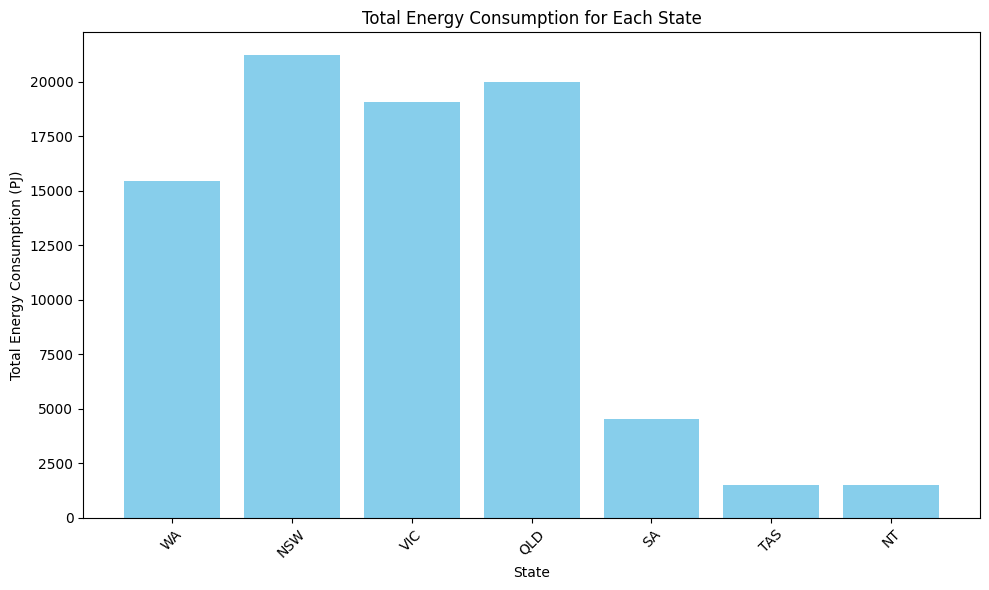

In [45]:
import matplotlib.pyplot as plt

# Extract state and the corresponding energy consumption
states = list(total_energy_consumption_by_state.keys())
total_consumption = list(total_energy_consumption_by_state.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(states, total_consumption, color='skyblue')

# Add head and tags
plt.title('Total Energy Consumption for Each State')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')

# Display bar chart
plt.xticks(rotation=45)  # rotate x axis tags
plt.tight_layout()  # adjust layout automatically to avoid overlapping
plt.show()




```
# This is formatted as code
```

**Group A Question 2:**

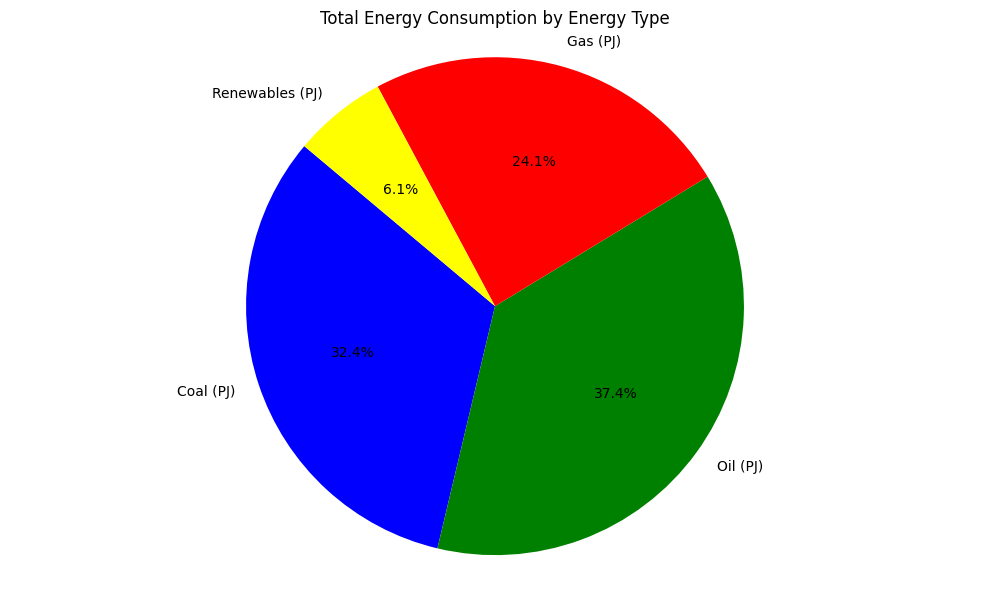

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming AUS_energy_df is your DataFrame containing energy data
# Group the data by fuel type and sum the energy consumption for each fuel type
fuel_type_totals = AUS_energy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

plt.figure(figsize=(10, 6))
# Plot the total energy consumption for each fuel type as a pie chart
fuel_type_totals.plot(kind='pie', colors=['blue', 'green', 'red', 'yellow'], autopct='%1.1f%%', startangle=140)

plt.title('Total Energy Consumption by Energy Type')
plt.ylabel('')  # No need for y-label in pie chart

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


**Group B Question 6**

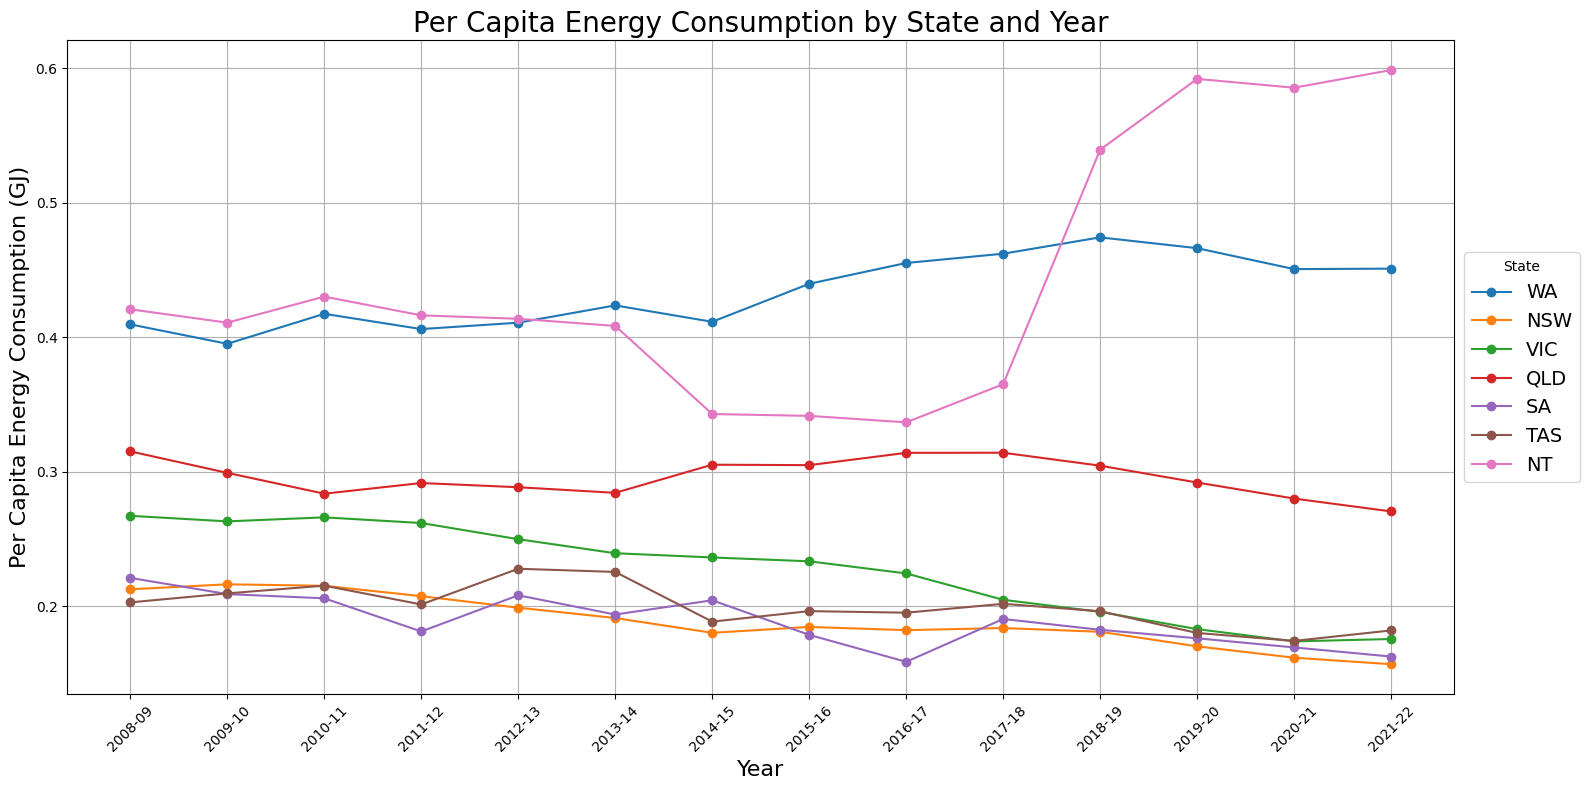

In [ ]:
df= AUS_energy_df
# We also used this list of all states as before.
states = ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']
# Calculate annual energy consumption per capita for each state
df['Total Energy (PJ)'] = df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)
df['Total Energy (GJ)'] = df['Total Energy (PJ)'] * 1000  # transfer PJ to GJ
df['Per Capita Energy (GJ)'] = df['Total Energy (GJ)'] / df['Population']

# Prepare the chart
plt.figure(figsize=(16, 8))

# Draw a line chart for each state
for state in states:
    state_data = df[df['State'] == state]
    plt.plot(state_data['Year'], state_data['Per Capita Energy (GJ)'], marker='o', label=state)


# Add title and tags
plt.title('Per Capita Energy Consumption by State and Year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Per Capita Energy Consumption (GJ)',fontsize=16)
plt.legend(title='State',fontsize= 20)
plt.legend(fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='State', loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
plt.grid(True)
plt.tight_layout()


# show the chart
plt.show()

**Group C Question 8**

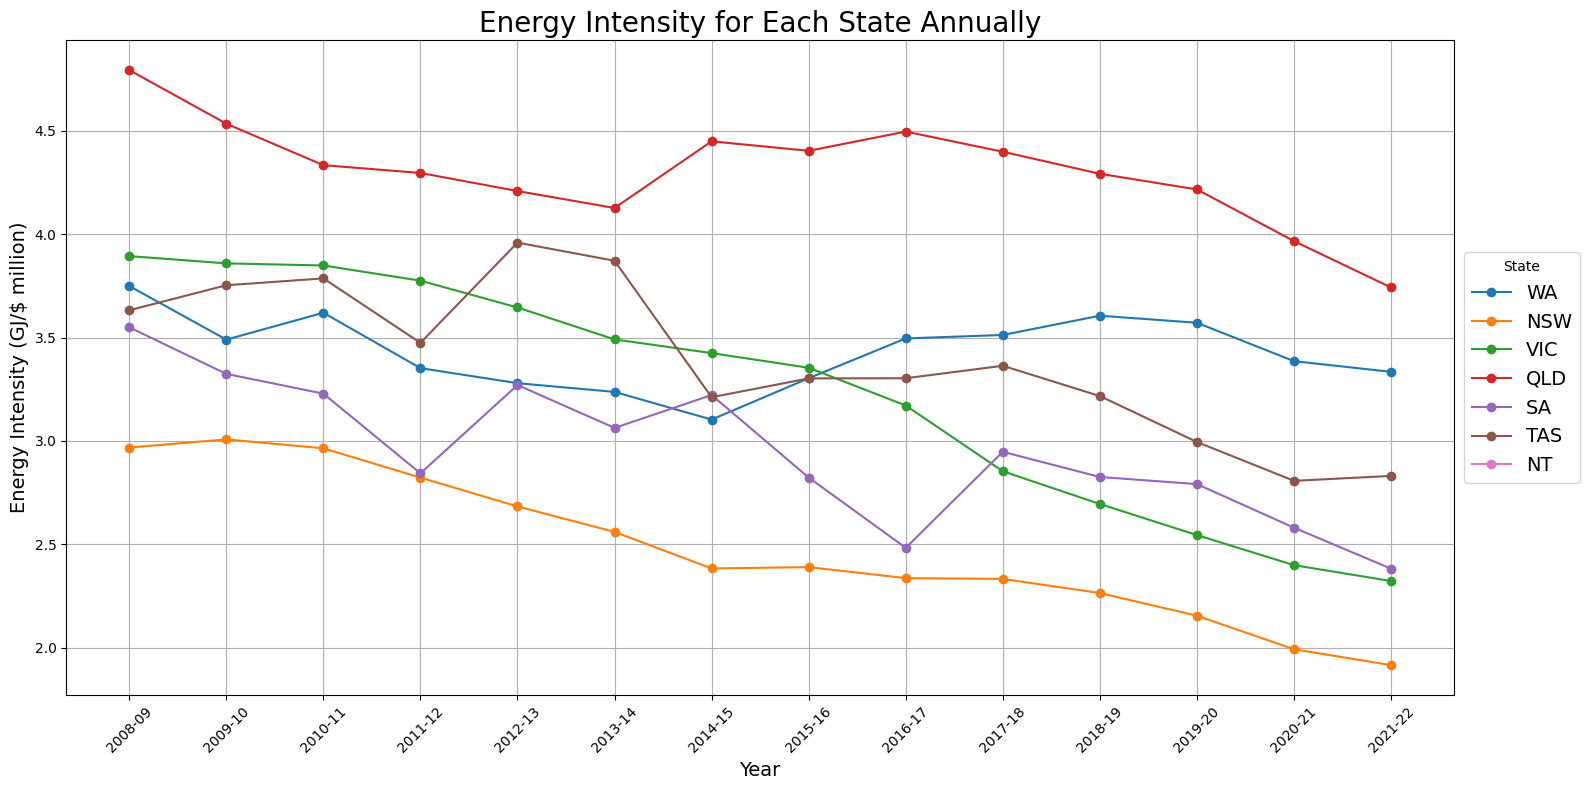

In [ ]:
df= AUS_energy_df
# We also used this list of all states as before.
states = ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']

# Calculate energy intensity for each state annually
df['Energy Intensity (GJ/$ million)'] = (df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']) / df['GSP ($ million)'] * 1000

# Prepare the chart
plt.figure(figsize=(16, 8))

# Draw a line chart for energy intensity for each state
for state in states:
    state_data = df[df['State'] == state]
    plt.plot(state_data['Year'], state_data['Energy Intensity (GJ/$ million)'], marker='o', label=state)

# Add title and labels
plt.title('Energy Intensity for Each State Annually',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Energy Intensity (GJ/$ million)',fontsize=14)
plt.legend(title='State', loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
plt.xticks(rotation=45) # Rotate x-axis labels
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()
